<a href="https://colab.research.google.com/github/CDAC-lab/BUS5PR1-Analytics-Notebooks/blob/master/Exercise_3_Convolution_Neural_Networks_for_Image_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3 - Convolution Neural Networks for Image Analysis

In this workshop we will usea CNN to classify images in the  [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. 

We will classify the fashion products in Fashion MNIST  into 10 classes. The dataset contains 70,000 grayscale images, with resolution of 28x28 pixels.   
We will use 60,000 images to train the classification CNN and 10,000 images to evaluate the accuracy of the network. 

## Load the data

Generally we have to download the dataset from a repository and upload to use in our application. However, Keras python library provides us access to directly load a limited number of benchmark datasets.   
Thus, we can access and load the Fashion-MNIST dataset directly from Keras.

In [1]:
# Load Tensorflow library
%tensorflow_version 1.x
from keras.datasets import fashion_mnist

TensorFlow 1.x selected.


Using TensorFlow backend.


The dataset is already setup as training and testing sets. (60K for training and 10K for testing)

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
# View the dataset shape
print('Train data shape:', X_train.shape)
print('Test data shape:', X_test.shape)

Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


X_train contains 60,000 train images with a resolution of 28x28.  
The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore and pre-process the data

In [5]:
# Load visualization library
import matplotlib.pyplot as plt

We will plot an image from the dataset to get a feel for the data

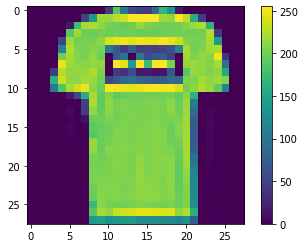

In [6]:
image_index = 1
plt.figure()
plt.imshow(X_train[image_index])
plt.colorbar()
plt.grid(False)
plt.show()

Display the first 25 images from the training set and display the class name below each image.   
It is important to verify that the data is in the correct format before building the model.

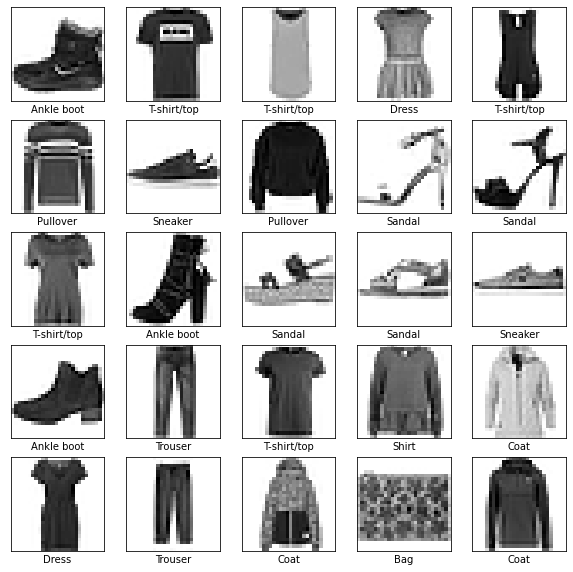

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

A main step of image processing is to scale the data. With this step, we will be able observe  the range of data.

In [8]:
# Import numpy library to process matrices
import numpy as np

In [9]:
print('min:', np.min(X_train[image_index]))
print('max:', np.max(X_train[image_index]))

min: 0
max: 255


It is evident that the data ranges from 0-255.   
We scale these values to a range of 0 to 1 before feeding to the neural network model.  
For this, we divide the values by 255.   
It's important that the training set and the testing set are preprocessed in the same way:

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Prepare for CNN processing by reshaping the image into (# training/testing samples, height, width, 1)

In [11]:
height, width = 28, 28

In [12]:
X_train = X_train.reshape(X_train.shape[0], height, width, 1)
X_test = X_test.reshape(X_test.shape[0], height, width, 1)

## Enable GPU

CPUs are designed for more general computing workloads.  GPUs in contrast are less flexible, however GPUs are designed for parallel  computations. Deep Neural Networks (DNN) are structured in a very uniform manner such that at each layer of the network thousands of identical artificial neurons perform the same computation.   Therefore the structure of a DNN fits quite well with the kinds of computation that a GPU can efficiently perform.

To enable GPU in Google Colab, 


1. Click on Runtime menu on the toolbar
2. Select change runtime type
3. Select GPU for Hardware Acceleration option list.
4. Select SAVE.



## Model Building

In this workshop, we will develop 3 deep learning models with increasing complexity to evaluate the classification accuracy.  


1.   3 Layer DNN
2.   1 Layer CNN
3.   3 Layer CNN

### 3-DNN Model

In this DNN model, we flatten the 28x28 image into a 784 input feature vector.  
It should be noted that with flattening we will face the inherent problems discussed in the class (i.e., scale, rotation, location, high-demensionality)

In [13]:
# Import Keras libraries
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [14]:
dnn3_model = Sequential()

In [15]:
dnn3_model.add(Flatten(input_shape=(width, height, 1)))  # Add Keras Flatten layer to conver (28x28) image -> 784 feature vector

In [16]:
dnn3_model.add(Dense(128, activation='relu')) 
dnn3_model.add(Dense(64, activation='relu')) 
dnn3_model.add(Dense(10, activation='softmax'))  # In the final layer we use softmax activation to classify the input into 10 classes.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Softmax is an activation function that turns logits into probabilities that sum to one. E.g.,

---


 
![alt text](https://cdn-images-1.medium.com/max/906/1*670CdxchunD-yAuUWdI7Bw.png)

For a complete understanding of available activation functions, please refer the following resources:  


1.   [ML Cheatsheat](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html)
2.   [Towards data science](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)




**Compiling the model**

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:  

* Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction. [Further details](https://keras.io/losses/) 
* Optimizer —This is how the model is updated based on the data it sees and its loss function. [Further details.](https://keras.io/optimizers/)
* Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified. [Further details.](https://keras.io/metrics/) 

In [17]:
dnn3_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Initially, we will train the model with 10 learning epochs. Based on the learning curve, visualized below, you could update this hyper-parameter to best fit the training data.

In [18]:
# Train the model
epochs = 10
batch_size = 32
validation_split = 0.1
history = dnn3_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split = validation_split)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 6s 113us/step - loss: 0.4977 - accuracy: 0.8220 - val_loss: 0.4144 - val_accuracy: 0.8423
Epoch 2/10
54000/54000 [==============================] - 4s 80us/step - loss: 0.3731 - accuracy: 0.8639 - val_loss: 0.3430 - val_accuracy: 0.8735
Epoch 3/10
54000/54000 [==============================] - 4s 82us/step - loss: 0.3382 - accuracy: 0.8755 - val_loss: 0.3513 - val_accuracy: 0.8715
Epoch 4/10
54000/54000 [==============================] - 4s 80us/step - loss: 0.3133 - accuracy: 0.8839 - val_loss: 0.3655 - val_accuracy: 0.8698
Epoch 5/10
54000/54000 [==============================] - 4s 81us/step - loss: 0.2977 - accuracy: 0.8901 - val_loss: 0.3496 - val_accuracy: 0.8748
Epoch 6/10
54000/54000 [==============================] - 4s 81us/step - loss: 0.2798 - accuracy: 0.8964 - val_loss: 0.3401 - val_accuracy: 0.8757
Epoch 7/10
54000/54000 [==============================] - 4s 82us/s

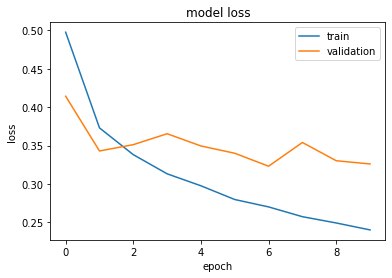

In [19]:
# Visualize the training curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

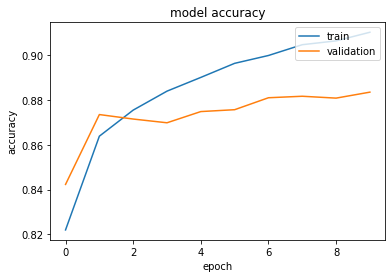

In [20]:
# Visualize accuracy (mean squared error)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [21]:
test_loss, test_acc = dnn3_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 43us/step
Test accuracy: 0.8774999976158142


### 1-CNN

As discussed in the lecture, CNN is specifically designed to process two-dimensional data spaces (focusing on image data).  
First, we will design a single layer CNN. This will include one convolutional layer, one max pooling layer and two fully connected layers.

In [22]:
# Import required libraries
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [23]:
# Set input shape
input_shape = (width, height, 1)

Construct the CNN model.

In [24]:
cnn1_model = Sequential()

Here we will use 3x3 filters (or kernals) to learn.

In [25]:
cnn1_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))   # We will use 32 of 3x3 kernals to learn
cnn1_model.add(MaxPooling2D(pool_size=(2, 2)))   # We use 2x2 max pooling

Flattent the previous output before sending to fully connected layers.

In [26]:
cnn1_model.add(Flatten())

We will use one fully connected (FC) layer with 128 nodes.

In [27]:
cnn1_model.add(Dense(64, activation='relu'))
cnn1_model.add(Dense(10, activation='softmax'))

In [28]:
# Compile the model
cnn1_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

As before, initially we will train the model for 10 epochs to evaluate the performance.  
Then, based on the accuracy/learning curve we will refine the hyper-parameters.

In [29]:
# Train the model
epochs = 10
batch_size = 32
validation_split = 0.1
history_1 = cnn1_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split = validation_split)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 10s 193us/step - loss: 0.4265 - accuracy: 0.8515 - val_loss: 0.3345 - val_accuracy: 0.8820
Epoch 2/10
54000/54000 [==============================] - 5s 96us/step - loss: 0.2964 - accuracy: 0.8953 - val_loss: 0.3022 - val_accuracy: 0.8875
Epoch 3/10
54000/54000 [==============================] - 5s 96us/step - loss: 0.2522 - accuracy: 0.9089 - val_loss: 0.2651 - val_accuracy: 0.9018
Epoch 4/10
54000/54000 [==============================] - 5s 97us/step - loss: 0.2208 - accuracy: 0.9190 - val_loss: 0.2523 - val_accuracy: 0.9073
Epoch 5/10
54000/54000 [==============================] - 5s 95us/step - loss: 0.1964 - accuracy: 0.9282 - val_loss: 0.2578 - val_accuracy: 0.9085
Epoch 6/10
54000/54000 [==============================] - 5s 96us/step - loss: 0.1756 - accuracy: 0.9356 - val_loss: 0.2612 - val_accuracy: 0.9075
Epoch 7/10
54000/54000 [==============================] - 5s 95us/s

In [30]:
cnn1_score = cnn1_model.evaluate(X_test, y_test)
print('Test loss:', cnn1_score[0])
print('Test accuracy:', cnn1_score[1])

10000/10000 [==============================] - 0s 49us/step
Test loss: 0.3076860413849354
Test accuracy: 0.9086999893188477


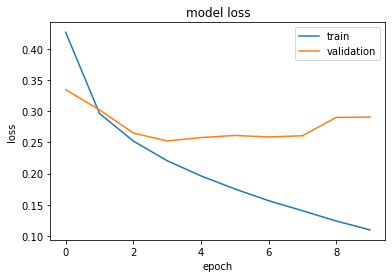

In [31]:
# Visualize the training curve
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

By analyzing the learning curve, you should be able to identify whether training the model longer would provide better results.

### 3-CNN

In this step, we will design a complex three layer CNN intending an improvement in the accuracy.

In [32]:
# Import required libraries
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [33]:
# Set input shape
input_shape = (width, height, 1)

In [34]:
cnn3_model = Sequential()

In [35]:
# CNN Layer 1
cnn3_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn3_model.add(MaxPooling2D((2, 2)))

# CNN Layer 2
cnn3_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3_model.add(MaxPooling2D(pool_size=(2, 2)))

# CNN Layer 3
cnn3_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

In [36]:
cnn3_model.add(Flatten())  # Flatten the previous output before sending to fully connected layers

In [37]:
cnn3_model.add(Dense(128, activation='relu'))
cnn3_model.add(Dense(10, activation='softmax'))

In [38]:
# Compile the model
cnn3_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
# Train the model
epochs = 10
batch_size = 32
validation_split = 0.1
history_3 = cnn3_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split = validation_split)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 129us/step - loss: 0.4761 - accuracy: 0.8250 - val_loss: 0.3294 - val_accuracy: 0.8783
Epoch 2/10
54000/54000 [==============================] - 6s 120us/step - loss: 0.3062 - accuracy: 0.8881 - val_loss: 0.2843 - val_accuracy: 0.8972
Epoch 3/10
54000/54000 [==============================] - 7s 121us/step - loss: 0.2602 - accuracy: 0.9045 - val_loss: 0.2660 - val_accuracy: 0.9035
Epoch 4/10
54000/54000 [==============================] - 7s 122us/step - loss: 0.2286 - accuracy: 0.9152 - val_loss: 0.2556 - val_accuracy: 0.9035
Epoch 5/10
54000/54000 [==============================] - 7s 121us/step - loss: 0.2034 - accuracy: 0.9245 - val_loss: 0.2641 - val_accuracy: 0.9103
Epoch 6/10
54000/54000 [==============================] - 6s 120us/step - loss: 0.1804 - accuracy: 0.9331 - val_loss: 0.2562 - val_accuracy: 0.9105
Epoch 7/10
54000/54000 [==============================] - 7s 12

In [40]:
cnn3_score = cnn3_model.evaluate(X_test, y_test)
print('Test loss:', cnn3_score[0])
print('Test accuracy:', cnn3_score[1])

10000/10000 [==============================] - 1s 53us/step
Test loss: 0.2923012498781085
Test accuracy: 0.9093999862670898


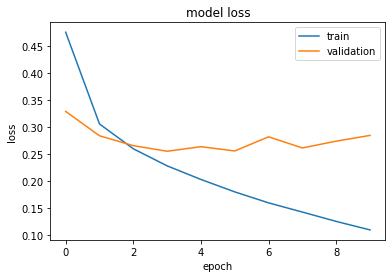

In [41]:
# Visualize the training curve
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Based on the leanring curve, it seems after first epoch the model starts to overfit.  
In such scenarios, **dropout** is used to mitigate the effect of overfitting. 

### 3-CNN with Dropout

Dropout aims to solve the significant challenge of overfitting. It is one of the biggest advancements in deep learning proposed in recent years.

The idea is very simple though, it is to randomly drop units in a deep neural network.

Learning the relationship between the inputs and the outputs of a dataset is a very complicated procedure. If you have a very small dataset, the relationship maybe a result of noise in the input sample.

Dropout refers to randomly and temporary removing a unit, either in a hidden or a visible layer, and all of its incoming and outgoing connections.

Further reading on dropout: 


*   [Machine Learning Mastery](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/)
*   [Marko Jerkic](https://markojerkic.com/what-is-dropout-deep-learning/)

![alt text](https://i1.wp.com/cdn-images-1.medium.com/max/800/1*iWQzxhVlvadk6VAJjsgXgg.png?resize=800%2C398&ssl=1)



Let's now attempt the same 3-CNN model with **dropout**.

In [42]:
# Load dropout from keras library
from keras.layers import Dropout

In [43]:
# Updated model layers
cnn3_dp_model = Sequential()

Now in each layer, we will add a dropout. The dropout rate is a hyper-parameter we could select based on our model requirements.

In [44]:
# CNN Layer 1
cnn3_dp_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn3_dp_model.add(MaxPooling2D((2, 2)))
cnn3_dp_model.add(Dropout(0.3))

# CNN Layer 2
cnn3_dp_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3_dp_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn3_dp_model.add(Dropout(0.3))

# CNN Layer 3
cnn3_dp_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3_dp_model.add(Dropout(0.3))

In [45]:
cnn3_dp_model.add(Flatten())  # Flatten the previous output before sending to fully connected layers

In [46]:
cnn3_dp_model.add(Dense(64, activation='relu'))
cnn3_dp_model.add(Dropout(0.3))
cnn3_dp_model.add(Dense(10, activation='softmax'))

In [47]:
# Compile the model
cnn3_dp_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
# Train the model
epochs = 15
batch_size = 32
validation_split = 0.1
history_3_dp = cnn3_dp_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split = validation_split)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 8s 144us/step - loss: 0.6621 - accuracy: 0.7546 - val_loss: 0.4245 - val_accuracy: 0.8420
Epoch 2/15
54000/54000 [==============================] - 7s 138us/step - loss: 0.4390 - accuracy: 0.8399 - val_loss: 0.3307 - val_accuracy: 0.8755
Epoch 3/15
54000/54000 [==============================] - 8s 139us/step - loss: 0.3814 - accuracy: 0.8627 - val_loss: 0.3178 - val_accuracy: 0.8825
Epoch 4/15
54000/54000 [==============================] - 7s 138us/step - loss: 0.3535 - accuracy: 0.8725 - val_loss: 0.2902 - val_accuracy: 0.8922
Epoch 5/15
54000/54000 [==============================] - 7s 139us/step - loss: 0.3332 - accuracy: 0.8798 - val_loss: 0.2714 - val_accuracy: 0.8970
Epoch 6/15
54000/54000 [==============================] - 7s 137us/step - loss: 0.3172 - accuracy: 0.8836 - val_loss: 0.2705 - val_accuracy: 0.8945
Epoch 7/15
54000/54000 [==============================] - 7s 13

In [49]:
cnn3_dp_score = cnn3_dp_model.evaluate(X_test, y_test)
print('Test loss:', cnn3_dp_score[0])
print('Test accuracy:', cnn3_dp_score[1])

10000/10000 [==============================] - 1s 58us/step
Test loss: 0.2576680428147316
Test accuracy: 0.9053999781608582


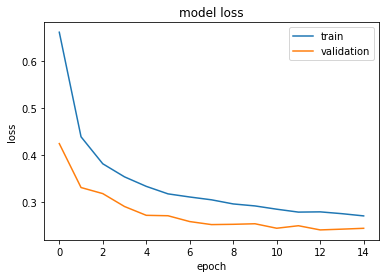

In [50]:
# Visualize the training curve
plt.plot(history_3_dp.history['loss'])
plt.plot(history_3_dp.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

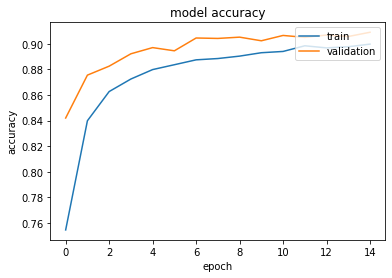

In [51]:
plt.plot(history_3_dp.history['accuracy'])
plt.plot(history_3_dp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

We can now see the overfitting problem has been solved by adding dropout.  
In order to improve accuracy, we could train the model for longer - more epochs (Hint: Try 20, 30, 40, 50, etc.)